In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


C:\Users\Sharath\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("F:\\projects\\Bike Sales Analysis\\bike_sales_india.csv")
data.head()

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3


In [3]:
data.columns

Index(['State', 'Avg Daily Distance (km)', 'Brand', 'Model', 'Price (INR)',
       'Year of Manufacture', 'Engine Capacity (cc)', 'Fuel Type',
       'Mileage (km/l)', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type', 'Resale Price (INR)', 'City Tier'],
      dtype='object')

In [4]:
data['Brand'].value_counts()

Brand
Kawasaki         1291
Yamaha           1283
KTM              1272
Royal Enfield    1253
Hero             1239
TVS              1234
Honda            1221
Bajaj            1207
Name: count, dtype: int64

In [5]:
data.dtypes

State                       object
Avg Daily Distance (km)    float64
Brand                       object
Model                       object
Price (INR)                  int64
Year of Manufacture          int64
Engine Capacity (cc)         int64
Fuel Type                   object
Mileage (km/l)             float64
Owner Type                  object
Registration Year            int64
Insurance Status            object
Seller Type                 object
Resale Price (INR)         float64
City Tier                   object
dtype: object

In [6]:
data.shape

(10000, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [8]:
data.isnull().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
# Convert categorical columns to 'category' type
cat_cols=['State','Brand','Model','Fuel Type','Owner Type','Insurance Status','Seller Type','City Tier']
data[cat_cols]=data[cat_cols].astype('category')

# Convert 'Registration Year' to datetime format
data['Registration Year']=pd.to_datetime(data['Registration Year'],format='%Y')

In [11]:
#Numerical columns 
num_cols=['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture',
            'Engine Capacity (cc)', 'Mileage (km/l)', 'Resale Price (INR)']

In [12]:
#Removing Outliers in a numerical Columns-using IQR method
def remove_outlier(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in num_cols:
    data=remove_outlier(data,col)

In [13]:
#Convert Text to Lowercase
data['Brand'] = data['Brand'].str.lower()
data['Model'] = data['Model'].str.lower()
data['Fuel Type'] = data['Fuel Type'].str.lower()
data['Owner Type'] = data['Owner Type'].str.lower()
data['Insurance Status'] = data['Insurance Status'].str.lower()
data['Seller Type'] = data['Seller Type'].str.lower()
data['City Tier'] = data['City Tier'].str.lower()

#Remove Whitespace in Categorical Columns
data[cat_cols]=data[cat_cols].apply(lambda x: x.str.strip())

In [14]:
data1=data[["Brand","Model"]]
data1.groupby(["Brand","Model"]).sum()

Empty DataFrame
Columns: []
Index: [(bajaj, avenger 220), (bajaj, ct 100), (bajaj, dominar 400), (bajaj, platina 110), (bajaj, pulsar 150), (hero, glamour), (hero, hf deluxe), (hero, passion pro), (hero, splendor plus), (hero, xtreme 160r), (honda, activa), (honda, cbr 650r), (honda, dio), (honda, shine), (honda, unicorn), (kawasaki, ninja 300), (kawasaki, ninja 400), (kawasaki, versys 650), (kawasaki, vulcan s), (kawasaki, z650), (ktm, 125 duke), (ktm, 250 duke), (ktm, 390 adventure), (ktm, duke 200), (ktm, rc 390), (royal enfield, classic 350), (royal enfield, himalayan), (royal enfield, hunter 350), (royal enfield, interceptor 650), (royal enfield, meteor 350), (tvs, apache rtr 160), (tvs, jupiter), (tvs, ntorq 125), (tvs, ronin), (tvs, sport), (yamaha, fascino 125), (yamaha, fz v3), (yamaha, mt-15), (yamaha, r15 v4), (yamaha, ray zr)]

# 1. Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'Avg Daily Distance (km)'}>,
        <Axes: title={'center': 'Price (INR)'}>],
       [<Axes: title={'center': 'Year of Manufacture'}>,
        <Axes: title={'center': 'Engine Capacity (cc)'}>],
       [<Axes: title={'center': 'Mileage (km/l)'}>,
        <Axes: title={'center': 'Resale Price (INR)'}>]], dtype=object)

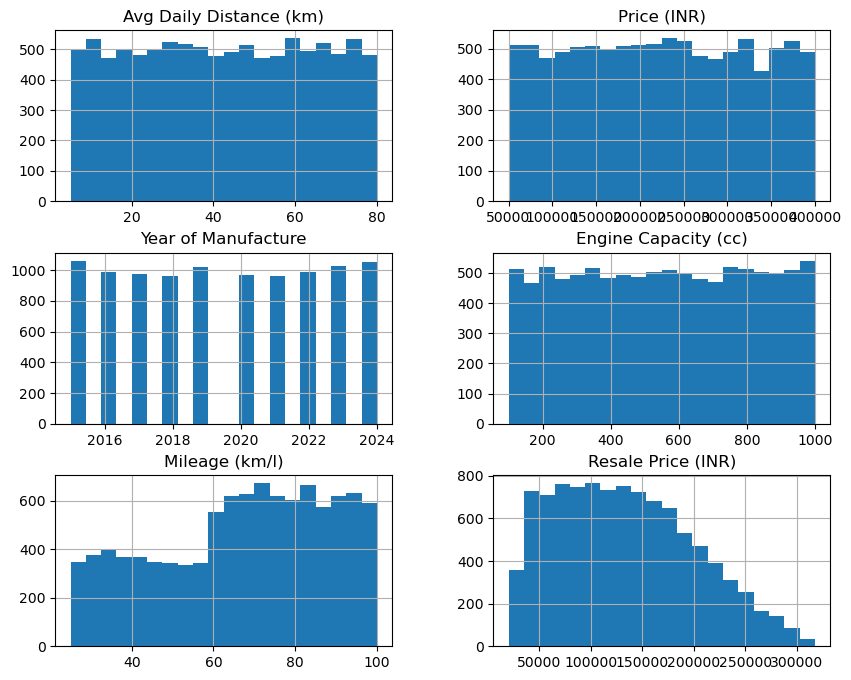

In [15]:
# Distribution of Numerical Variables
data[num_cols].hist(figsize=(10,8),bins=20)


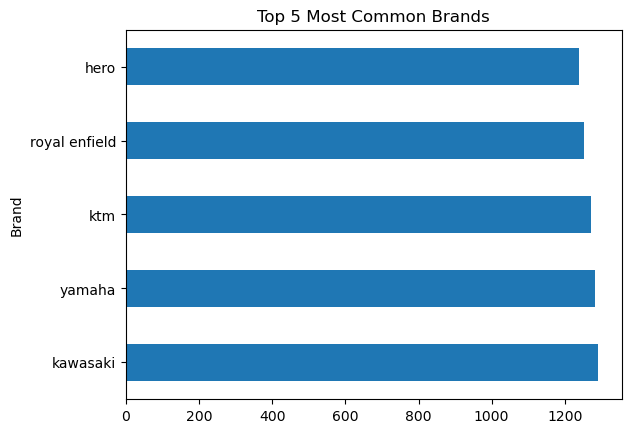

In [16]:
#Count of Bikes per brand
data['Brand'].value_counts().head().plot(kind='barh',title='Top 5 Most Common Brands')
plt.show()

In [17]:
#Count of bikes per Brand and Model

bike_counts=data.groupby(['Brand','Model']).size().reset_index(name='Count')
bike_counts.head(10)

,Brand,Model,Count
0,bajaj,avenger 220,249
1,bajaj,ct 100,236
2,bajaj,dominar 400,233
3,bajaj,platina 110,228
4,bajaj,pulsar 150,261
5,hero,glamour,258
6,hero,hf deluxe,257
7,hero,passion pro,247
8,hero,splendor plus,228
9,hero,xtreme 160r,249


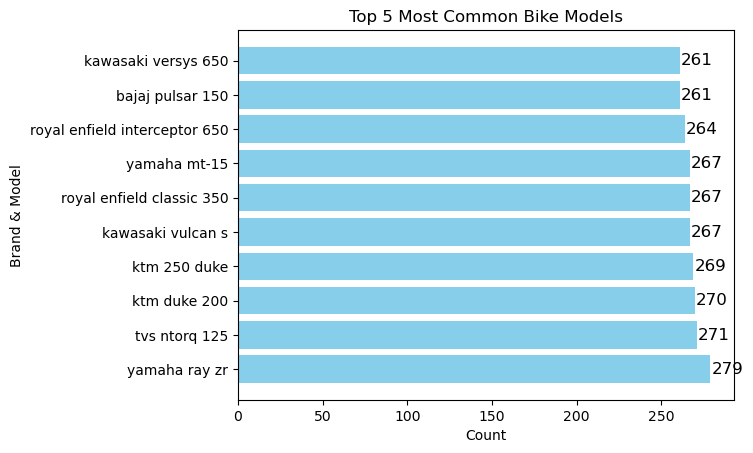

In [18]:
# Get the top 10 most common Brand-Model pairs
top_bikes=bike_counts.nlargest(10,'Count')

plt.barh(top_bikes.apply(lambda x: f"{x['Brand']} {x['Model']}",axis=1),top_bikes['Count'],color='skyblue')
for i, v in enumerate(top_bikes['Count']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=12)

# Labels and title
plt.xlabel("Count")
plt.ylabel("Brand & Model")
plt.title("Top 5 Most Common Bike Models")

plt.show()

# 2. Price Analysis

a) Price vs. Brand

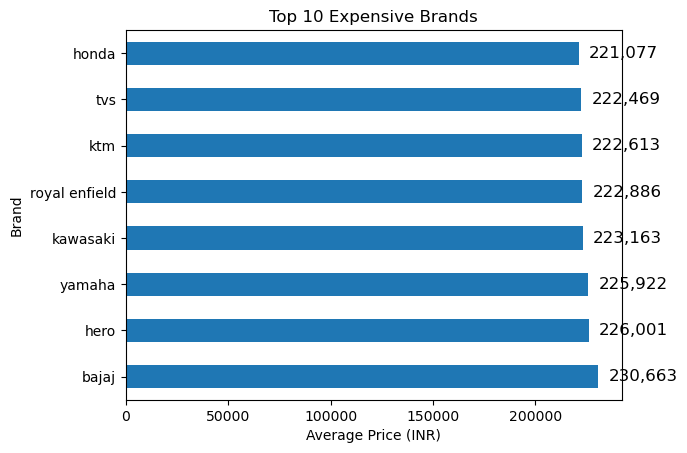

In [19]:
brand_price = data.groupby('Brand')['Price (INR)'].mean().sort_values(ascending=False)

top_brands = brand_price.head(10)

ax=top_brands.plot(kind='barh', title='Top 10 Expensive Brands')
for i, v in enumerate(top_brands):
    plt.text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=12) 

# Show the plot
plt.xlabel("Average Price (INR)")
plt.ylabel("Brand")
plt.show()

b) Price vs. Engine Capacity

<Axes: xlabel='Engine Capacity (cc)', ylabel='Price (INR)'>

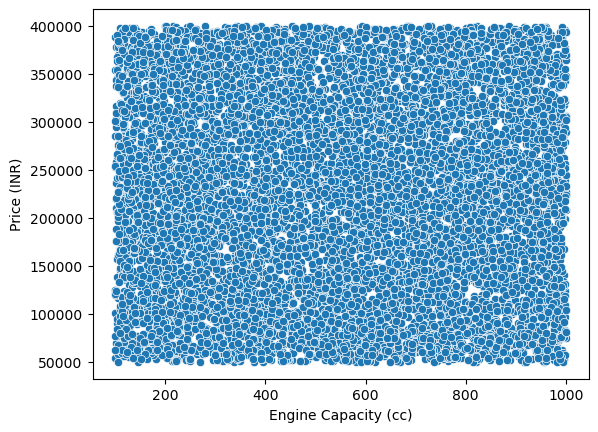

In [20]:
sns.scatterplot(x=data['Engine Capacity (cc)'], y=data['Price (INR)'])


c) Price vs. Mileage

Do fuel-efficient cars have higher resale value?

<Axes: xlabel='Mileage (km/l)', ylabel='Resale Price (INR)'>

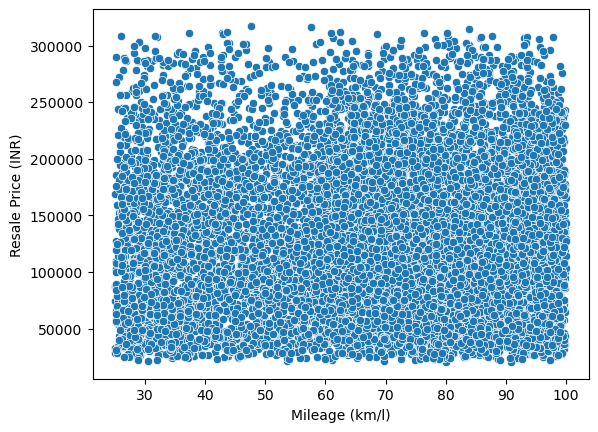

In [21]:
sns.scatterplot(x=data['Mileage (km/l)'], y=data['Resale Price (INR)'])


# 3. Vehicle Performance Analysis
   
a) How does mileage vary by fuel type?

<Axes: xlabel='Fuel Type', ylabel='Mileage (km/l)'>

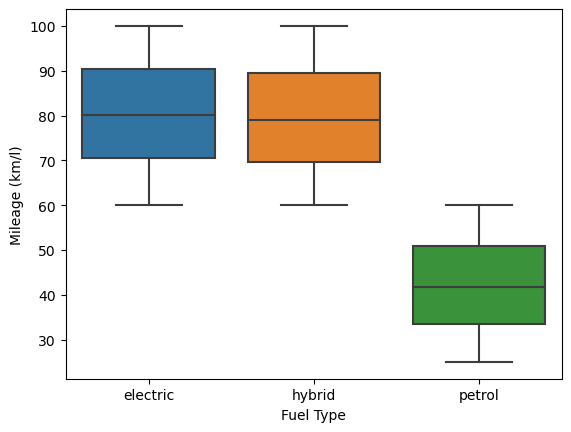

In [22]:
sns.boxplot(x=data['Fuel Type'], y=data['Mileage (km/l)'])

b) Impact of Age on Resale Price

How does vehicle age affect resale price?

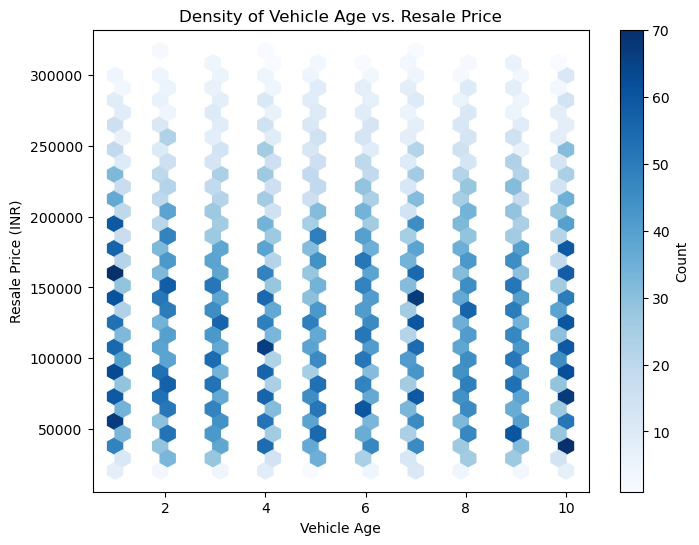

In [23]:
data['Vehicle Age'] = 2025 - data['Year of Manufacture']
#sns.scatterplot(x=data['Vehicle Age'], y=data['Resale Price (INR)'])
plt.figure(figsize=(8, 6))
plt.hexbin(data['Vehicle Age'], data['Resale Price (INR)'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Vehicle Age')
plt.ylabel('Resale Price (INR)')
plt.title('Density of Vehicle Age vs. Resale Price')
plt.show()

#hexbin plot for density visualization.
#Groups data into hexagonal bins.
#Darker bins indicate higher data density.


c) Most Fuel-Efficient Brands

<Axes: ylabel='Brand'>

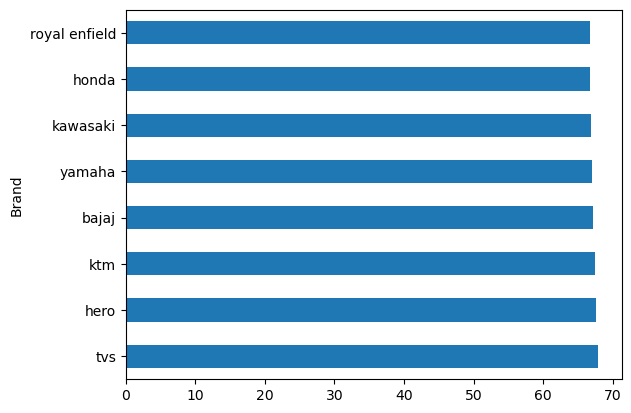

In [24]:
data.groupby('Brand')['Mileage (km/l)'].mean().sort_values(ascending=False).head(10).plot(kind='barh')


# 4. Resale Price Prediction

You can use Machine Learning (ML) to predict the resale price based on features like Brand, Model, Engine Capacity, Mileage, Owner Type, and Year of Manufacture.

In [25]:
df=data.copy()
# Feature Engineering - Add Vehicle Age
df["Vehicle Age"] = 2025 - df["Year of Manufacture"]
df.drop(columns=["Year of Manufacture"], inplace=True)  # Drop redundant column

# Encode categorical variables
label_cols = ['Brand', 'Model', 'Fuel Type', 'Owner Type', 'Insurance Status', 'Seller Type', 'City Tier']
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

# Features and Target Variable
features = ["Avg Daily Distance (km)", "Brand", "Model", "Price (INR)", "Engine Capacity (cc)", 
            "Mileage (km/l)", "Owner Type", "Insurance Status", "Seller Type", "City Tier", "Vehicle Age"]
target = "Resale Price (INR)"

X = df[features]
y = df[target]

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
#A) Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results: MAE = {rf_mae}, RMSE = {rf_rmse}, R2 Score = {rf_r2}")

Random Forest Results: MAE = 23049.459694051362, RMSE = 29599.585671115176, R2 Score = 0.8005260513554489


In [28]:
#B) Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Results: MAE = {xgb_mae}, RMSE = {xgb_rmse}, R2 Score = {xgb_r2}")


XGBoost Results: MAE = 23726.029139062503, RMSE = 30778.770942738858, R2 Score = 0.7843162290112238


In [29]:
# Choose best-performing model
if rf_mae < xgb_mae:
    print("✅ Random Forest is the best model!")
    final_model = rf_model
else:
    print("✅ XGBoost is the best model!")
    final_model = xgb_model


✅ Random Forest is the best model!


In [30]:
# Random sample input
sample_input = np.array([[50, 2, 5, 600000, 1500, 18, 1, 0, 1, 2, 5]])  # Modify values as needed

# Scale the input using the fitted scaler
sample_input_scaled = scaler.transform(sample_input)

# Predict using the best model
predicted_resale_value = final_model.predict(sample_input_scaled)
print(f"Predicted Resale Price: INR {predicted_resale_value[0]:,.2f}")

Predicted Resale Price: INR 216,038.37


C:\Users\Sharath\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
#Save the Model
import joblib

# Save Model
joblib.dump(final_model, "resale_price_model.pkl")

# Save Scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']